# Entrenado redes Feed-Forward

Usaremos keras para de manera muy fácil entrenar redes feed-forward usando descenso estocástico de  gradiente.

In [1]:
# Importamos librerías necesarias

from tensorflow import keras
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

2023-03-31 20:49:36.992516: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-03-31 20:49:37.096142: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-03-31 20:49:37.097209: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-31 20:49:37.841875: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Setamos los seed para números random

np.random.seed(30)
tf.random.set_seed(30)

In [3]:
# Cargamos los datos de entrenamiento de MNIST

(imgs, labs), _ = keras.datasets.mnist.load_data()
print(imgs.shape)
print(labs.shape)

(60000, 28, 28)
(60000,)


In [4]:
imgs.shape

(60000, 28, 28)

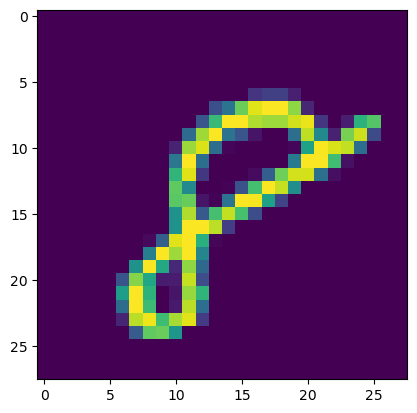

In [5]:
plt.imshow(imgs[59999, :, :])

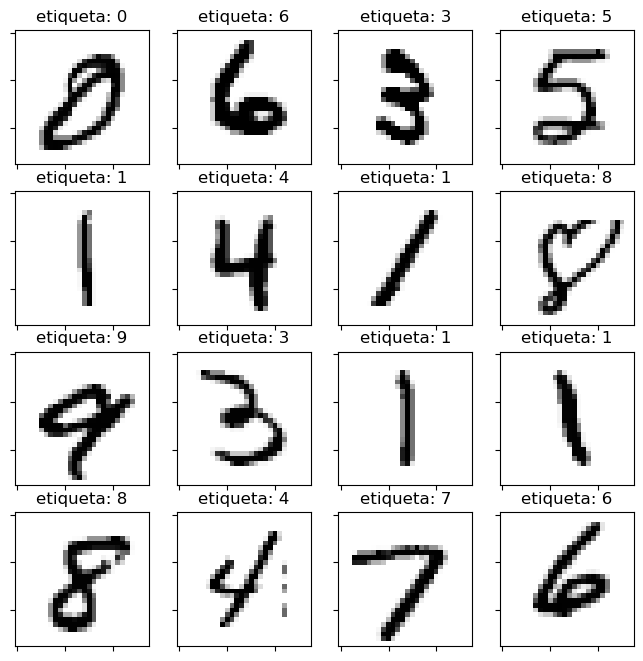

In [6]:
# Mostramos una grilla de ejemplos (al azar)

h = 4 # alto de la grilla
w = 4 # ancho de la grilla
fig, axs = plt.subplots(h, w, figsize=(2*h,2*w))
for i in range(h):
  for j in range(w):
    ex = np.random.randint(len(imgs))
    axs[i,j].set_title("etiqueta: " + str(labs[ex]))
    axs[i,j].set_xticklabels([])
    axs[i,j].set_yticklabels([])
    axs[i,j].grid(False)
    axs[i,j].imshow(imgs[ex], cmap="Greys")

In [7]:
# Tranformamos los datos para el entrenamiento

# los X's los cambiamos a vectores de una dimension
# y luego normalizamos
X = imgs.reshape(60000,28*28)
X = X / 255
print(X.shape)

# los Y's los cambiamos a vecotres de 10 componentes (one-hot)
Y = keras.utils.to_categorical(labs, 10)
print(Y.shape)

(60000, 784)
(60000, 10)


In [8]:
# cantidad de ejemplos, neuronas de entrada y neuronas de salida

M = X.shape[0]
N = X.shape[1]
C = Y.shape[1]

print(M,N,C)

60000 784 10


In [9]:
# tamaños de capas escondidas

h1 = 64
h2 = 32

In [10]:
# nuestra red feed-forward

red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
red.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

red.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 primera_capa (Dense)        (None, 64)                50240     
                                                                 
 segunda_capa (Dense)        (None, 32)                2080      
                                                                 
 capa_de_output (Dense)      (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


2023-03-31 20:49:54.956396: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-03-31 20:49:55.032427: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [11]:
# Ahora compilamos la red para poder entrenar (con .compile)
# Necesitamos definir 
#   - la pérdica ("loss"), en nuestro caso, "categorical_crossentropy"
#   - el algoritmo de optimización ("optimizer"), en nuestro caso "sgd"
# También podemos agregar una lista de métrics ("metrics"). 
# Agregamos "accuracy"

red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

In [12]:
# Entrenamos simplemente haciendo .fit y entregando los inputs
# Podemos definir también la cantidad de épocas ("epochs"), 
# el tamaño del paquete de entrenamiento ("batch_size"), 
# y otros parámetros que veremos más adelante.
# Guardamos el resultado en una variable para analizar.

h = red.fit(X, Y,
        epochs=5,
        batch_size=512,
       )

Epoch 1/5
118/118 [==============================] - 0s 2ms/step - loss: 2.0946 - accuracy: 0.3293
Epoch 2/5
118/118 [==============================] - 0s 2ms/step - loss: 1.6023 - accuracy: 0.5568
Epoch 3/5
118/118 [==============================] - 0s 2ms/step - loss: 1.1594 - accuracy: 0.6956
Epoch 4/5
118/118 [==============================] - 0s 2ms/step - loss: 0.8904 - accuracy: 0.7618
Epoch 5/5
118/118 [==============================] - 0s 2ms/step - loss: 0.7355 - accuracy: 0.8037


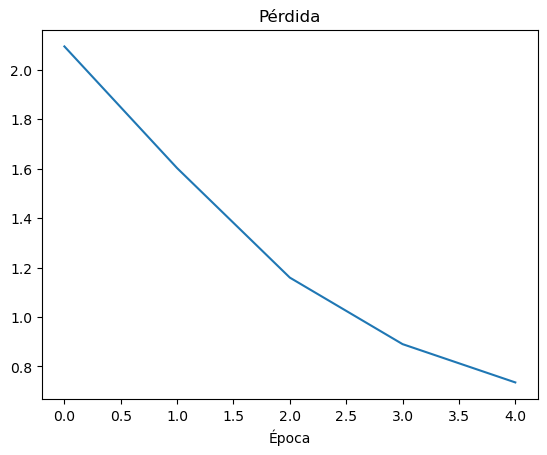

In [13]:
# imprime la pérdida para cada época

plt.plot(h.history['loss'])
plt.title('Pérdida')
plt.xlabel('Época')
plt.show()


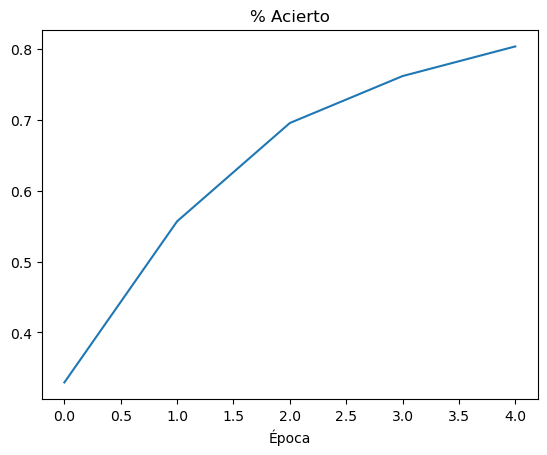

In [14]:
# imprime el porcentaje de acierto para cada época

plt.plot(h.history['accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')
plt.show()


1/1 [==============================] - 0s 11ms/step


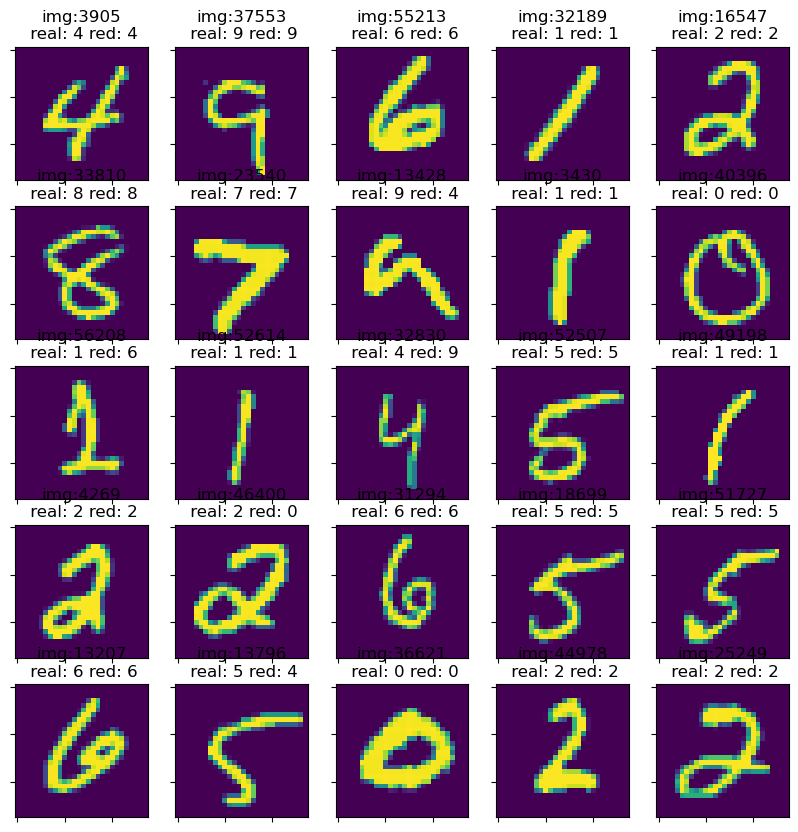

In [15]:
# Veamos algunas predicciones
h = 5
w = 5

fig, axs = plt.subplots(h, w, figsize=(2*h,2*w))
for i in range(h):
  for j in range(w):
    ex = np.random.randint(len(imgs))
    Xin = X[ex].reshape(1,28*28)
    Ypred = red.predict(Xin).reshape(10)
    lpred = np.argmax(Ypred)
    
    axs[i,j].set_title("img:" + str(ex) + "\n real: " + str(labs[ex]) + " red: " + str(lpred))
    axs[i,j].set_xticklabels([])
    axs[i,j].set_yticklabels([])
    axs[i,j].grid(False)
    axs[i,j].imshow(imgs[ex])

## Ejercicio 1: ¿Sin normalizar datos?

Elimina la parte del código anterior que normaliza los datos (donde dividimos por 255) y mira qué le pasa al entrenamiento. No tiene que escribir nuevo código, sólo saca esa parte y reentrena  la red (debes crear otra vez la red, compilarla y luego  hacer `fit`)

In [16]:
# Tranformamos los datos para el entrenamiento

(imgs, labs), _ = keras.datasets.mnist.load_data()

# los X's los cambiamos a vectores de una dimension
# y luego normalizamos
X = imgs.reshape(60000,28*28)
# X = X / 255
print(X.shape)

# los Y's los cambiamos a vecotres de 10 componentes (one-hot)
Y = keras.utils.to_categorical(labs, 10)
print(Y.shape)


M = X.shape[0]
N = X.shape[1]
C = Y.shape[1]

print(M,N,C)

h1 = 64
h2 = 32


red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
red.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

red.summary()

red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

h = red.fit(X, Y,
        epochs=5,
        batch_size=512,
       )

(60000, 784)
(60000, 10)
60000 784 10
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 primera_capa (Dense)        (None, 64)                50240     
                                                                 
 segunda_capa (Dense)        (None, 32)                2080      
                                                                 
 capa_de_output (Dense)      (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
118/118 [==============================] - 0s 2ms/step - loss: 1568.8652 - accuracy: 0.1047
Epoch 2/5
118/118 [==============================] - 0s 2ms/step - loss: 2.3022 - accuracy: 0.1124
Epoch 3/5
118/118 [==============================] - 0s 2ms/step - loss: 2.

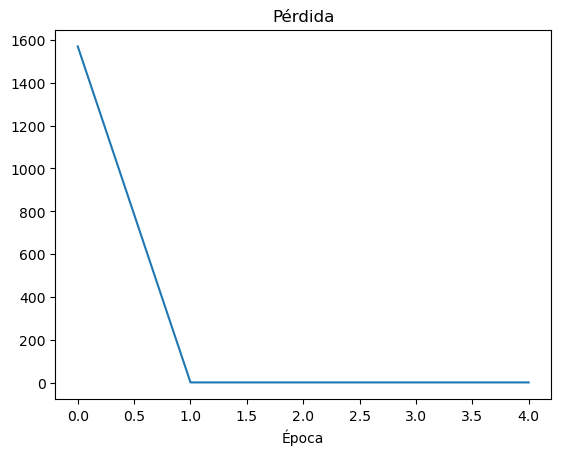

In [17]:
plt.plot(h.history['loss'])
plt.title('Pérdida')
plt.xlabel('Época')
plt.show()


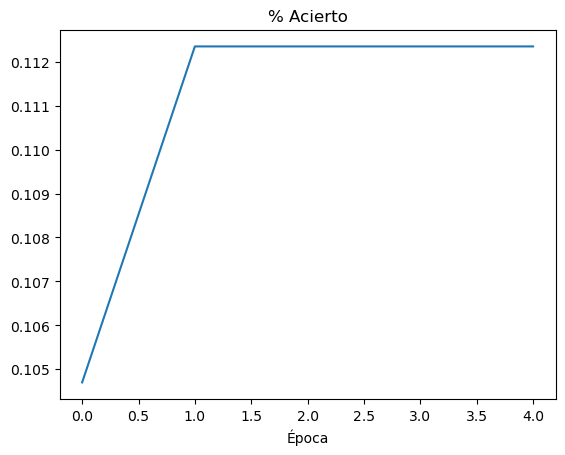

In [18]:
plt.plot(h.history['accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')
plt.show()

## Ejercicio 2: Entrenando por más épocas

Entrena la red, esta vez por más épocas (pueba con 20 o 30). Para comenzar el entrenamiento desde 0 otra vez, debes reconstruir la red y luego ejecutar `.compile` otra vez (puedes copiar el código de arriba). Luego del entrenamiento, imprime la historia y compáralo con el resultado anterior. 

Hazle cambios a la red o al entrenamiento para intentar mejorar aun más el acierto. Comenta con tus compañeros qué cambios podrían dar buenos resultados y pruébalos ¿Hasta qué acierto puedes llegar? 

(IMPORTANTE: No olvides normalizar el input de la red otra vez)

In [23]:
# Reconstruimos y recompilamos la red


(imgs, labs), _ = keras.datasets.mnist.load_data()

# los X's los cambiamos a vectores de una dimension
# y luego normalizamos
X = imgs.reshape(60000,28*28)
X = X / 255
print(X.shape)

# los Y's los cambiamos a vecotres de 10 componentes (one-hot)
Y = keras.utils.to_categorical(labs, 10)
print(Y.shape)


M = X.shape[0]
N = X.shape[1]
C = Y.shape[1]

print(M,N,C)

h1 = 64
h2 = 32

red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
red.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

# Acá empieza tu código para entrenamiento  (~3 líneas)
h = red.fit(X, Y,
        epochs=50,
        batch_size=512,
       )
# Acá termina tu código

(60000, 784)
(60000, 10)
60000 784 10
Epoch 1/50
118/118 [==============================] - 0s 2ms/step - loss: 2.1222 - accuracy: 0.3156
Epoch 2/50
118/118 [==============================] - 0s 2ms/step - loss: 1.5839 - accuracy: 0.5808
Epoch 3/50
118/118 [==============================] - 0s 2ms/step - loss: 1.1033 - accuracy: 0.7621
Epoch 4/50
118/118 [==============================] - 0s 2ms/step - loss: 0.8134 - accuracy: 0.8207
Epoch 5/50
118/118 [==============================] - 0s 2ms/step - loss: 0.6561 - accuracy: 0.8473
Epoch 6/50
118/118 [==============================] - 0s 2ms/step - loss: 0.5639 - accuracy: 0.8618
Epoch 7/50
118/118 [==============================] - 0s 2ms/step - loss: 0.5056 - accuracy: 0.8707
Epoch 8/50
118/118 [==============================] - 0s 2ms/step - loss: 0.4662 - accuracy: 0.8774
Epoch 9/50
118/118 [==============================] - 0s 2ms/step - loss: 0.4377 - accuracy: 0.8828
Epoch 10/50
118/118 [==============================] - 0s 2ms/

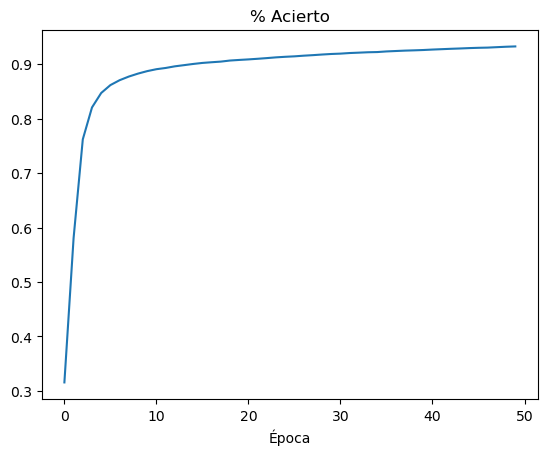

In [24]:
# Imprime el porcentaje de acierto para cada época

# Acá empieza tu código  (~5 líneas)
plt.plot(h.history['accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')
plt.show()
# Acá termina tu código

# CIFAR10: Entrenando con datos mas complejos

Entrenaremos una red para aprender los datos de [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html). Este es un conjunto de 50.000 imágenes de entrenamiento etiquetadas en 10 clases

| etiqueta | objeto    |
|----------|-----------|
| 0        | avión     |
| 1        | automóvil |
| 2        | pájaro    |
| 3        | gato      |
| 4        | venado    |
| 5        | perro     |
| 6        | rana      |
| 7        | caballo   |
| 8        | barco     |
| 9        | camión    |

Comenzaremos cargando los datos y mostrando algunos ejemplos

In [25]:
(imgs,labs), _ = keras.datasets.cifar10.load_data()
print(imgs.shape)
print(labs.shape)

(50000, 32, 32, 3)
(50000, 1)


In [26]:
# Lista de nombres para usar como etiquetas

nombres = ['avión', 'auto', 'pájaro', 'gato', 'venado', 'perro', 'rana', 'caballo', 'barco', 'camión']

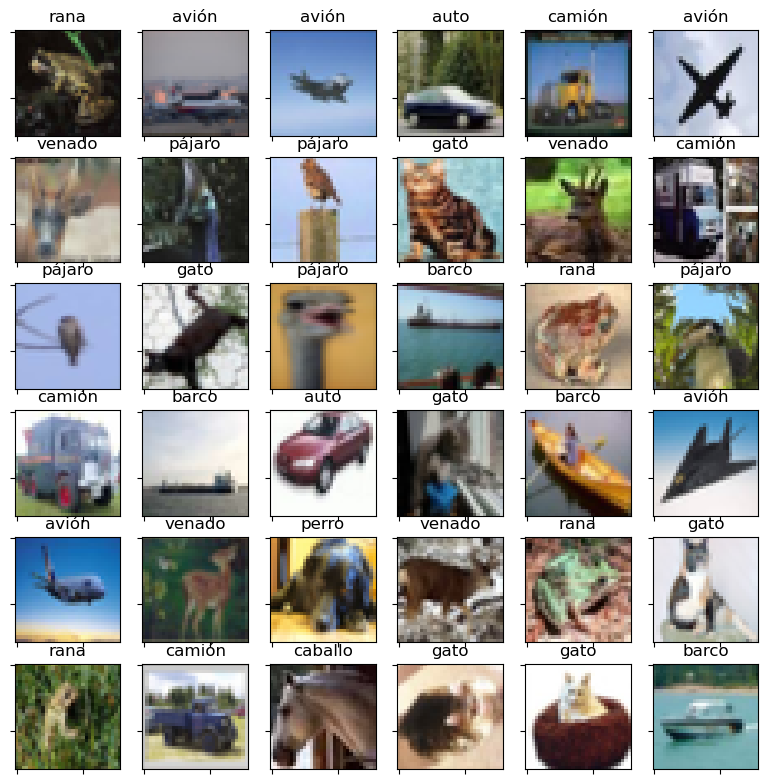

In [27]:
# Mostramos una grilla de ejemplos (al azar)

h = 6 # alto de la grilla
w = 6 # ancho de la grilla
fig, axs = plt.subplots(h, w, figsize=(1.6*h,1.6*w))
for i in range(h):
  for j in range(w):
    ex = np.random.randint(len(imgs))
    axs[i,j].set_title(nombres[labs[ex][0]])
    axs[i,j].grid(False)
    axs[i,j].set_xticklabels([])
    axs[i,j].set_yticklabels([])
    axs[i,j].imshow(imgs[ex])

In [28]:
# los X's los cambiamos a vectores de una dimension
# y luego normalizamos
X = imgs.reshape(50000,32*32*3)
X = X / 255 
print(X.shape)

# los Y's los cambiamos a vecotres de 10 componentes (one-hot)
Y = keras.utils.to_categorical(labs, 10)
print(Y.shape)

(50000, 3072)
(50000, 10)


In [29]:
# cantidad de ejemplos, neuronas de entrada y neuronas de salida

M = X.shape[0]
N = X.shape[1]
C = Y.shape[1]

print(M,N,C)

50000 3072 10


##  Ejercicio 3: Entrenando con CIFAR10

Ahora usa todo lo que  has aprendido para crear una red y  entrenar con los datos de CIFAR10. Trata de crear una red que alcance al menos unn  55% de acierto en los datos de entrenamiento. Esta parte requiere bastante más código! Al finalizar muestra  una grilla con las predicciones de tu red.

In [39]:
# Crea la red, compílala, entrénala, muestra el acierto por época
# y finalmente muestra ejemplos de las predicciones

red = keras.Sequential()
red.add(keras.layers.Dense(256, input_dim=N, activation='relu', name='capa01'))
red.add(keras.layers.Dense(128, activation='relu', name='capa02'))
red.add(keras.layers.Dense(96, activation='relu', name='capa03'))
red.add(keras.layers.Dense(64, activation='relu', name='capa04'))
red.add(keras.layers.Dense(48, activation='relu', name='capa05'))
red.add(keras.layers.Dense(32, activation='relu', name='capa06'))
red.add(keras.layers.Dense(16, activation='relu', name='capa07'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

red.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 capa01 (Dense)              (None, 256)               786688    
                                                                 
 capa02 (Dense)              (None, 128)               32896     
                                                                 
 capa03 (Dense)              (None, 96)                12384     
                                                                 
 capa04 (Dense)              (None, 64)                6208      
                                                                 
 capa05 (Dense)              (None, 48)                3120      
                                                                 
 capa06 (Dense)              (None, 32)                1568      
                                                                 
 capa07 (Dense)              (None, 16)               

In [48]:
red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy'],
)

In [49]:
h = red.fit(X, Y,
        epochs=500,
        batch_size=4096,
       )

Epoch 1/500
13/13 [==============================] - 1s 31ms/step - loss: 1.6617 - accuracy: 0.4036
Epoch 2/500
13/13 [==============================] - 0s 31ms/step - loss: 1.6787 - accuracy: 0.4022
Epoch 3/500
13/13 [==============================] - 0s 31ms/step - loss: 1.6508 - accuracy: 0.4085
Epoch 4/500
13/13 [==============================] - 0s 32ms/step - loss: 1.6679 - accuracy: 0.4022
Epoch 5/500
13/13 [==============================] - 0s 32ms/step - loss: 1.6356 - accuracy: 0.4141
Epoch 6/500
13/13 [==============================] - 0s 33ms/step - loss: 1.6682 - accuracy: 0.4011
Epoch 7/500
13/13 [==============================] - 0s 32ms/step - loss: 1.6488 - accuracy: 0.4101
Epoch 8/500
13/13 [==============================] - 0s 32ms/step - loss: 1.6672 - accuracy: 0.4072
Epoch 9/500
13/13 [==============================] - 0s 32ms/step - loss: 1.6213 - accuracy: 0.4192
Epoch 10/500
13/13 [==============================] - 0s 33ms/step - loss: 1.6600 - accuracy: 0.4052

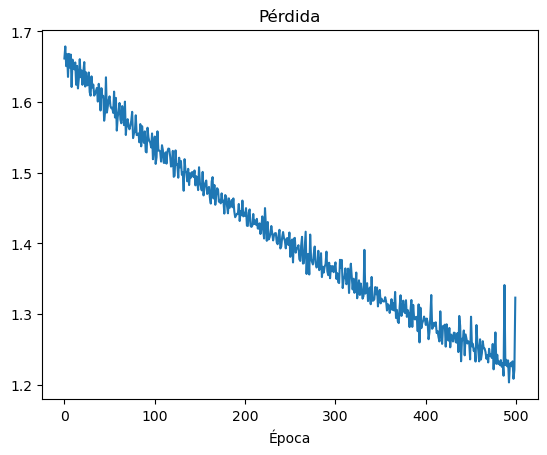

In [50]:
# imprime la pérdida para cada época

plt.plot(h.history['loss'])
plt.title('Pérdida')
plt.xlabel('Época')
plt.show()

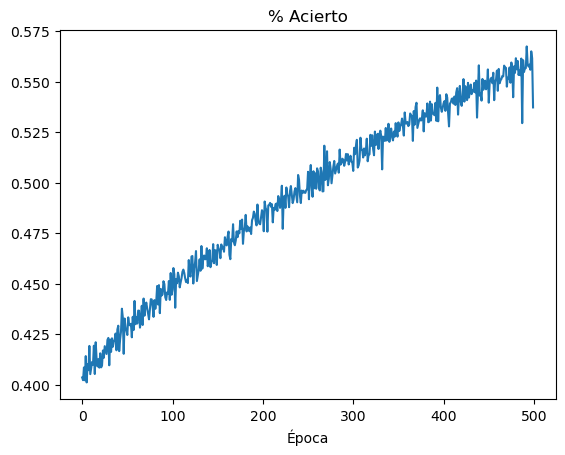

In [51]:
plt.plot(h.history['accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')
plt.show()

Alternativamente

In [52]:
red = keras.Sequential()
red.add(keras.layers.Dense(384, input_dim=N, activation='relu', name='capa01'))
red.add(keras.layers.Dense(128, activation='relu', name='capa02'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

red.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 capa01 (Dense)              (None, 384)               1180032   
                                                                 
 capa02 (Dense)              (None, 128)               49280     
                                                                 
 capa_de_output (Dense)      (None, 10)                1290      
                                                                 
Total params: 1,230,602
Trainable params: 1,230,602
Non-trainable params: 0
_________________________________________________________________


In [53]:
red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy'],
)

In [55]:
h = red.fit(X, Y,
        epochs=100,
        batch_size=4096,
       )

Epoch 1/100
13/13 [==============================] - 1s 38ms/step - loss: 1.8759 - accuracy: 0.3500
Epoch 2/100
13/13 [==============================] - 1s 39ms/step - loss: 1.8684 - accuracy: 0.3525
Epoch 3/100
13/13 [==============================] - 0s 37ms/step - loss: 1.8631 - accuracy: 0.3537
Epoch 4/100
13/13 [==============================] - 1s 39ms/step - loss: 1.8574 - accuracy: 0.3554
Epoch 5/100
13/13 [==============================] - 1s 39ms/step - loss: 1.8507 - accuracy: 0.3598
Epoch 6/100
13/13 [==============================] - 1s 39ms/step - loss: 1.8449 - accuracy: 0.3620
Epoch 7/100
13/13 [==============================] - 1s 39ms/step - loss: 1.8402 - accuracy: 0.3636
Epoch 8/100
13/13 [==============================] - 1s 39ms/step - loss: 1.8352 - accuracy: 0.3642
Epoch 9/100
13/13 [==============================] - 1s 39ms/step - loss: 1.8299 - accuracy: 0.3675
Epoch 10/100
13/13 [==============================] - 1s 39ms/step - loss: 1.8259 - accuracy: 0.3674

1/1 [==============================] - 0s 11ms/step


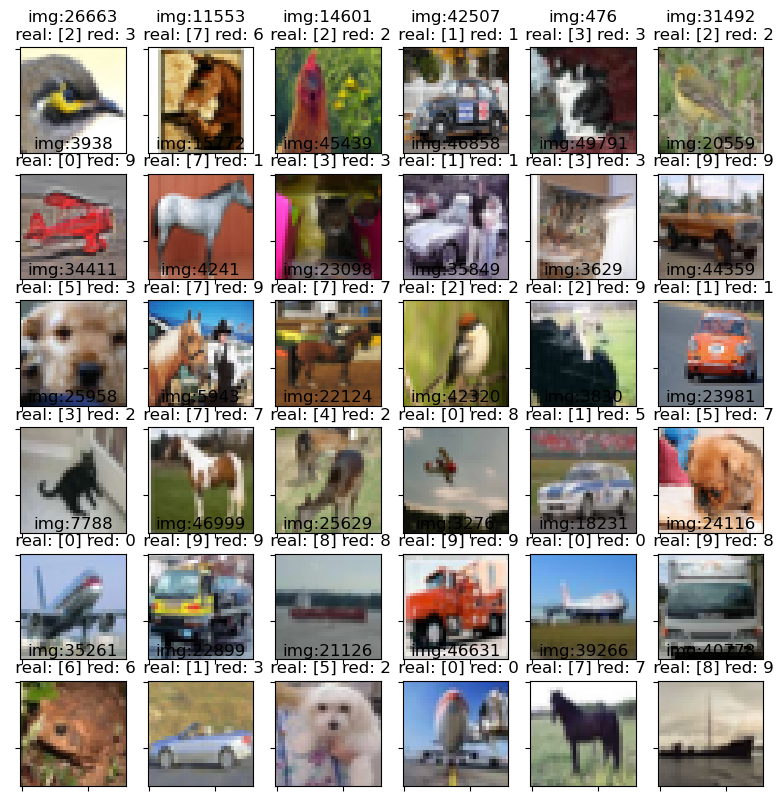

In [56]:
# # Veamos algunas predicciones
# h = 5
# w = 5

# fig, axs = plt.subplots(h, w, figsize=(2*h,2*w))
# for i in range(h):
#   for j in range(w):
#     ex = np.random.randint(len(imgs))
#     Xin = X[ex].reshape(1,32*32*3)
#     Ypred = red.predict(Xin).reshape(10)
#     lpred = np.argmax(Ypred)
    
#     axs[i,j].set_title("img:" + str(ex) + "\n real: " + str(labs[ex]) + " red: " + str(lpred))
#     axs[i,j].set_xticklabels([])
#     axs[i,j].set_yticklabels([])
#     axs[i,j].grid(False)
#     axs[i,j].imshow(imgs[ex])



h = 6 # alto de la grilla
w = 6 # ancho de la grilla
fig, axs = plt.subplots(h, w, figsize=(1.6*h,1.6*w))
for i in range(h):
  for j in range(w):
    ex = np.random.randint(len(imgs))
    Xin = X[ex].reshape(1,32*32*3)
    Ypred = red.predict(Xin).reshape(10)
    lpred = np.argmax(Ypred)

    axs[i,j].set_title("img:" + str(ex) + "\n real: " + str(labs[ex]) + " red: " + str(lpred))
    # axs[i,j].set_title(nombres[labs[ex][0]])
    axs[i,j].grid(False)
    axs[i,j].set_xticklabels([])
    axs[i,j].set_yticklabels([])
    axs[i,j].imshow(imgs[ex])